To look for other events for different competitions within the StatsBomb open data repository, we need to identify competition IDs and their corresponding match IDs. 

The StatsBomb open data repository organizes match data by competitions and seasons, and each match is associated with a unique match ID. Here's a general approach to achieve this:

### 1. **Identify Competition and Season IDs**: 
First, we need to find the IDs for the competition and season we're interested in. StatsBomb provides a `competitions.json` JSON file that lists all competitions and their details, including competition IDs and season IDs.

```json
root [] 70 items
0:
    competition_id 9
    season_id 27
    country_name "Germany"
    competition_name "1. Bundesliga"
    competition_gender "male"
    competition_youth false
    competition_international false
    season_name "2015/2016"
    match_updated "2023-12-12T07:43:33.436182"
    match_updated_ 360null
    match_available_ 360null
    match_available "2023-12-12T07:43:33.436182"
```

In [25]:
def list_competitions():
    with open('Statsbomb/data/competitions.json') as file:
        competitions = json.load(file)
    df_competitions = pd.json_normalize(competitions)
    return df_competitions

# Call this function to see all available competitions and their details
competitions_df = list_competitions()
competitions_df[['competition_id', 'season_id', 'competition_name', 'season_name']]


,competition_id,season_id,competition_name,season_name
0,9,27,1. Bundesliga,2015/2016
1,16,4,Champions League,2018/2019
2,16,1,Champions League,2017/2018
3,16,2,Champions League,2016/2017
4,16,27,Champions League,2015/2016
...,...,...,...,...
65,55,43,UEFA Euro,2020
66,35,75,UEFA Europa League,1988/1989
67,53,106,UEFA Women's Euro,2022
68,72,107,Women's World Cup,2023


### Creating a competitions dict for finding competitions 
The function essentially converts the DataFrame competitions_df into a dictionary where each key is a tuple `(competition_id, season_id)` and each value is a dictionary containing `competition_name` and `season_name`. This helps in organizing and accessing the competition data efficiently based on their IDs and seasons.

In [ ]:
def create_competitions_dict(competitions_df):
    # Initialize an empty dictionary to store competition data
    competitions_dict = {}
    
    # Loop through each row in the competitions DataFrame
    for index, row in competitions_df.iterrows():
        # Extract the competition_id and season_id from the current row
        key = (row['competition_id'], row['season_id'])
        
        # Create a dictionary containing competition_name and season_name
        value = {
            'competition_name': row['competition_name'],
            'season_name': row['season_name']
        }
        
        # Check if the combination of competition_id and season_id is not already in the dictionary
        if key not in competitions_dict:
            # If not present, add it to the dictionary with its corresponding value
            competitions_dict[key] = value
            
    # Return the populated competitions dictionary
    return competitions_dict


In [46]:
# Call the function to create the dictionary
competitions_dict = create_competitions_dict(competitions_df)

competitions_dict

{(9, 27): {'competition_name': '1. Bundesliga', 'season_name': '2015/2016'},
 (16, 4): {'competition_name': 'Champions League', 'season_name': '2018/2019'},
 (16, 1): {'competition_name': 'Champions League', 'season_name': '2017/2018'},
 (16, 2): {'competition_name': 'Champions League', 'season_name': '2016/2017'},
 (16, 27): {'competition_name': 'Champions League',
  'season_name': '2015/2016'},
 (16, 26): {'competition_name': 'Champions League',
  'season_name': '2014/2015'},
 (16, 25): {'competition_name': 'Champions League',
  'season_name': '2013/2014'},
 (16, 24): {'competition_name': 'Champions League',
  'season_name': '2012/2013'},
 (16, 23): {'competition_name': 'Champions League',
  'season_name': '2011/2012'},
 (16, 22): {'competition_name': 'Champions League',
  'season_name': '2010/2011'},
 (16, 21): {'competition_name': 'Champions League',
  'season_name': '2009/2010'},
 (16, 41): {'competition_name': 'Champions League',
  'season_name': '2008/2009'},
 (16, 39): {'compet

In [153]:
# Print the created dictionary
print("Dictionary for Finding Competition IDs:\n")
prev_competition_id = None
for key, value in competitions_dict.items():
    if key[0] != prev_competition_id:
        print("=== COMPETITION ID: ", key[0], " ===> ",value['competition_name'])
    print("Season ID:", key[1])
    print("Season:", value['season_name'])
    print()
    prev_competition_id = key[0]

Dictionary for Finding Competition IDs:

=== COMPETITION ID:  9  ===>  1. Bundesliga
Season ID: 27
Season: 2015/2016

=== COMPETITION ID:  16  ===>  Champions League
Season ID: 4
Season: 2018/2019

Season ID: 1
Season: 2017/2018

Season ID: 2
Season: 2016/2017

Season ID: 27
Season: 2015/2016

Season ID: 26
Season: 2014/2015

Season ID: 25
Season: 2013/2014

Season ID: 24
Season: 2012/2013

Season ID: 23
Season: 2011/2012

Season ID: 22
Season: 2010/2011

Season ID: 21
Season: 2009/2010

Season ID: 41
Season: 2008/2009

Season ID: 39
Season: 2006/2007

Season ID: 37
Season: 2004/2005

Season ID: 44
Season: 2003/2004

Season ID: 76
Season: 1999/2000

Season ID: 277
Season: 1972/1973

Season ID: 71
Season: 1971/1972

Season ID: 276
Season: 1970/1971

=== COMPETITION ID:  87  ===>  Copa del Rey
Season ID: 84
Season: 1983/1984

Season ID: 268
Season: 1982/1983

Season ID: 279
Season: 1977/1978

=== COMPETITION ID:  37  ===>  FA Women's Super League
Season ID: 90
Season: 2020/2021

Season I

In [154]:
# Open the file in write mode and save it for later use
with open("competition_ids.txt", "w") as file:
    # Loop through the dictionary
    prev_competition_id = None
    for key, value in competitions_dict.items():
        # Write the competition ID and name if it's a new competition
        if key[0] != prev_competition_id:
            file.write(f"=== COMPETITION ID: {key[0]} ===> {value['competition_name']}\n")
        # Write the season ID and name
        file.write(f"Season ID: {key[1]}\n")
        file.write(f"Season: {value['season_name']}\n\n")
        prev_competition_id = key[0]

print("File 'competition_ids.txt' has been created successfully.")


File 'competition_ids.txt' has been created successfully.


### List available seasons for competition_id

In [232]:
# Accessing elements in the dictionary
competition_id = 12

# Initialize a list to store all seasons for the given competition ID
seasons = []

# Iterate over the dictionary to find all entries with the given competition ID
for key, value in competitions_dict.items():
    if key[0] == competition_id:
        # If the competition ID matches, append the season ID to the seasons list
        seasons.append(key[1])

# Print the list of seasons associated with the given competition ID
if seasons:
    print(f"Seasons for Competition ID {competition_id}:")
    for season_id in seasons:
        # Find the corresponding season name from the dictionary
        for key, value in competitions_dict.items():
            if key[0] == competition_id and key[1] == season_id:
                season_name = value['season_name']
                print(f"- Season ID: {season_id}, Season Name: {season_name}")
else:
    print(f"No seasons found for Competition ID {competition_id}.")



Seasons for Competition ID 12:
- Season ID: 27, Season Name: 2015/2016
- Season ID: 86, Season Name: 1986/1987


### 2. **List Matches for a Competition**: 
Once you have the competition and season IDs, you can locate the JSON file that lists all matches for that competition and season. This file will provide you with match IDs for all the matches in that competition and season.

In [234]:
# Accessing elements in the dictionary
competition_id = 12
season_id = 27

# Construct the key using competition_id and season_id
key = (competition_id, season_id)

# Accessing the value corresponding to the key
if key in competitions_dict:
    competition_info = competitions_dict[key]
    print("Competition Name:", competition_info['competition_name'])
    print("Season Name:", competition_info['season_name'])
else:
    print("Competition ID and Season ID combination not found in the dictionary.")


Competition Name: Serie A
Season Name: 2015/2016


In [235]:
with open('Statsbomb/data/matches/'+str(competition_id)+'/'+str(season_id)+'.json') as f:
    matches = json.load(f)

In [236]:
len(matches) 

380

In [237]:
matches[0]

{'match_id': 3879863,
 'match_date': '2016-05-08',
 'kick_off': '15:00:00.000',
 'competition': {'competition_id': 12,
  'country_name': 'Italy',
  'competition_name': 'Serie A'},
 'season': {'season_id': 27, 'season_name': '2015/2016'},
 'home_team': {'home_team_id': 228,
  'home_team_name': 'Atalanta',
  'home_team_gender': 'male',
  'home_team_group': None,
  'country': {'id': 112, 'name': 'Italy'},
  'managers': [{'id': 3567,
    'name': 'Edoardo Reja',
    'nickname': None,
    'dob': '1945-10-10',
    'country': {'id': 112, 'name': 'Italy'}}]},
 'away_team': {'away_team_id': 230,
  'away_team_name': 'Udinese',
  'away_team_gender': 'male',
  'away_team_group': None,
  'country': {'id': 112, 'name': 'Italy'},
  'managers': [{'id': 1003077,
    'name': 'Luigi De Canio',
    'nickname': None,
    'dob': '1957-09-26',
    'country': {'id': 112, 'name': 'Italy'}}]},
 'home_score': 1,
 'away_score': 1,
 'match_status': 'available',
 'match_status_360': 'unscheduled',
 'last_updated': '

In [238]:
match_id = matches[0]['match_id'] # a match
match_id

3879863

In [239]:
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    home_score=match['home_score']
    away_score=match['away_score']
    describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
    result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
    print(describe_text + result_text)

The match between Atalanta and Udinese finished 1 : 1
The match between Frosinone and Udinese finished 2 : 0
The match between Udinese and Torino finished 1 : 5
The match between Torino and Napoli finished 1 : 2
The match between Inter Milan and Napoli finished 2 : 0
The match between Lazio and Empoli finished 2 : 0
The match between Atalanta and Fiorentina finished 2 : 3
The match between AS Roma and Empoli finished 3 : 1
The match between Lazio and Atalanta finished 2 : 0
The match between Sassuolo and Bologna finished 0 : 2
The match between AC Milan and Sampdoria finished 4 : 1
The match between Frosinone and AC Milan finished 2 : 4
The match between Sampdoria and Napoli finished 2 : 4
The match between Lazio and Chievo finished 4 : 1
The match between Napoli and Udinese finished 1 : 0
The match between Juventus and Fiorentina finished 3 : 1
The match between AS Roma and Atalanta finished 0 : 2
The match between Hellas Verona and Sassuolo finished 1 : 1
The match between Bologna an

In [247]:
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    home_score=match['home_score']
    away_score=match['away_score']

    # Matches ended 3 - 2
    if home_score == 3 and  away_score == 2:
    
        describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
        result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
        print(describe_text + result_text)

The match between Bologna and Napoli finished 3 : 2
The match between AS Roma and Torino finished 3 : 2
The match between Genoa and Torino finished 3 : 2
The match between Palermo and Hellas Verona finished 3 : 2
The match between Sassuolo and Empoli finished 3 : 2
The match between Bologna and Sampdoria finished 3 : 2
The match between Frosinone and Hellas Verona finished 3 : 2
The match between Genoa and Chievo finished 3 : 2
The match between AC Milan and Palermo finished 3 : 2


## Refactoring the code 

Now, let's start by refactoring the original code `2PlotShotsAndPasses` into 2 seprate functions.

### Function for Loading Match Events Data

In [130]:
import json
import pandas as pd

def load_match_events(match_id):
    file_name = f'{match_id}.json'
    with open(f'Statsbomb/data/events/{file_name}') as data_file:
        data = json.load(data_file)
    df = pd.json_normalize(data, sep="_").assign(match_id=match_id)
    return df

In [131]:
df = load_match_events(match_id)

In [132]:
df.tail()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,foul_committed_offensive,dribble_nutmeg,block_offensive,clearance_other,pass_goal_assist,match_id
3160,7d6d31bc-c05d-4b24-bdd6-0e65b186c864,3161,2,00:49:47.013,94,47,171,5.106718,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
3161,3b5e7262-9bfc-4283-af7e-a5248489cc6b,3162,2,00:49:54.372,94,54,172,2.007300,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
3162,69f61217-9d24-4ada-ac32-e5e962838728,3163,2,00:49:56.379,94,56,172,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
3163,5ab3545e-9469-48d3-8475-0b556962860b,3164,2,00:50:00.837,95,0,172,0.000000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912
3164,dd2d7d73-ddd4-49ec-9d34-7425a9c686bd,3165,2,00:50:00.837,95,0,172,0.000000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22912


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Columns: 118 entries, id to match_id
dtypes: float64(32), int64(10), object(76)
memory usage: 2.8+ MB


In [205]:
df.describe()

,index,period,minute,second,possession,duration,type_id,possession_team_id,play_pattern_id,team_id,...,goalkeeper_technique_id,clearance_body_part_id,interception_outcome_id,duel_outcome_id,dribble_outcome_id,50_50_outcome_id,goalkeeper_body_part_id,substitution_outcome_id,substitution_replacement_id,match_id
count,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,2319.000000,3165.000000,3165.000000,3165.000000,3165.000000,...,11.000000,51.000000,15.000000,24.000000,15.000000,6.000000,9.000000,6.0,6.000000,3165.0
mean,1583.000000,1.483096,44.593997,28.249921,79.778831,1.345962,32.250553,33.757978,3.743444,32.236335,...,45.272727,38.784314,10.733333,13.541667,8.600000,1.666667,35.888889,103.0,4983.666667,22912.0
std,913.801127,0.499793,26.020009,17.307651,47.478085,1.352128,12.102208,6.434799,2.407563,6.891043,...,0.467099,4.674671,5.049281,3.889553,0.507093,0.816497,1.763834,0.0,2966.490160,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,24.000000,1.000000,24.000000,...,45.000000,37.000000,4.000000,4.000000,8.000000,1.000000,35.000000,103.0,3473.000000,22912.0
25%,792.000000,1.000000,22.000000,14.000000,39.000000,0.377226,30.000000,24.000000,1.000000,24.000000,...,45.000000,37.000000,4.000000,13.000000,8.000000,1.000000,35.000000,103.0,3488.250000,22912.0
50%,1583.000000,1.000000,45.000000,28.000000,80.000000,1.084111,30.000000,38.000000,4.000000,38.000000,...,45.000000,37.000000,13.000000,14.000000,9.000000,1.500000,35.000000,103.0,3620.000000,22912.0
75%,2374.000000,2.000000,65.000000,43.000000,117.000000,1.859130,42.000000,38.000000,4.000000,38.000000,...,45.500000,40.000000,14.000000,16.000000,9.000000,2.000000,35.000000,103.0,4496.500000,22912.0
max,3165.000000,2.000000,95.000000,59.000000,172.000000,15.653612,43.000000,38.000000,9.000000,38.000000,...,46.000000,70.000000,16.000000,17.000000,9.000000,3.000000,39.000000,103.0,10956.000000,22912.0


In [221]:
pd.set_option('display.max_columns', None)
print(df)

                                        id  index  period     timestamp  \
0     9ec3d009-c15b-4a8d-be80-57a07f40755a      1       1  00:00:00.000   
1     e8bdb5d1-8bcb-4a0d-bfd2-68c18c7f54d0      2       1  00:00:00.000   
2     00b678a4-3767-4d0b-92e6-9cb4c959d94d      3       1  00:00:00.000   
3     05840f64-0fb7-4f2d-885a-49790d6bd4df      4       1  00:00:00.000   
4     b67ef6a9-e877-4dbe-bb03-edcc9d8c7711      5       1  00:00:00.208   
...                                    ...    ...     ...           ...   
3160  7d6d31bc-c05d-4b24-bdd6-0e65b186c864   3161       2  00:49:47.013   
3161  3b5e7262-9bfc-4283-af7e-a5248489cc6b   3162       2  00:49:54.372   
3162  69f61217-9d24-4ada-ac32-e5e962838728   3163       2  00:49:56.379   
3163  5ab3545e-9469-48d3-8475-0b556962860b   3164       2  00:50:00.837   
3164  dd2d7d73-ddd4-49ec-9d34-7425a9c686bd   3165       2  00:50:00.837   

      minute  second  possession  duration  type_id      type_name  \
0          0       0         

### Display all Columns

Here we can display all the columns in the match event dataframe

In [219]:
column_list = [column for column in df.columns]
column_list

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'type_id',
 'type_name',
 'possession_team_id',
 'possession_team_name',
 'play_pattern_id',
 'play_pattern_name',
 'team_id',
 'team_name',
 'tactics_formation',
 'tactics_lineup',
 'related_events',
 'location',
 'player_id',
 'player_name',
 'position_id',
 'position_name',
 'pass_recipient_id',
 'pass_recipient_name',
 'pass_length',
 'pass_angle',
 'pass_height_id',
 'pass_height_name',
 'pass_end_location',
 'pass_body_part_id',
 'pass_body_part_name',
 'pass_type_id',
 'pass_type_name',
 'carry_end_location',
 'pass_switch',
 'pass_outcome_id',
 'pass_outcome_name',
 'ball_receipt_outcome_id',
 'ball_receipt_outcome_name',
 'under_pressure',
 'duel_type_id',
 'duel_type_name',
 'pass_aerial_won',
 'pass_through_ball',
 'pass_technique_id',
 'pass_technique_name',
 'foul_committed_penalty',
 'foul_committed_type_id',
 'foul_committed_type_name',
 'shot_statsbomb_xg',
 'shot_end_location',

### Function to Plot Shots


In [184]:
from FCPython import createPitch
import matplotlib.pyplot as plt
import numpy as np

def plot_shots(df, home_team_required, away_team_required, player_name=None):
    """
    Plot the shots made in a match, optionally filtering by a specific player.

    Parameters:
    - df: DataFrame containing shot event data.
    - home_team_required: Name of the home team.
    - away_team_required: Name of the away team.
    - player_name: The name of the player to filter shots by. If None, plot all shots.
    """
    # Draw the pitch
    pitchLengthX, pitchWidthY = 120, 80
    (fig, ax) = createPitch(pitchLengthX, pitchWidthY, 'yards', 'gray')
    
    # Filter shots by player name if provided
    if player_name:
        shots = df.loc[(df['type_name'] == 'Shot') & (df['player_name'] == player_name)].set_index('id')
    else:
        shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    
    # Visualize shots and goals
    for i, shot in shots.iterrows():
        x = shot['location'][0]
        y = shot['location'][1]

        goal = shot['shot_outcome_name'] == 'Goal'
        team_name = shot['team_name']

        circleSize = 2  # Example: for dynamic size based on xG: np.sqrt(shot['shot_statsbomb_xg']) * 12
        #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12
        
        if team_name == home_team_required:
            if goal:
                shotCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="red")
                plt.text(x + 1, pitchWidthY - y + 1, shot['player_name'], fontsize=8)
            else:
                shotCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="red", alpha=0.2)
        elif team_name == away_team_required:
            if goal:
                shotCircle = plt.Circle((pitchLengthX - x, y), circleSize, color="blue")
                plt.text(pitchLengthX - x + 1, y + 1, shot['player_name'], fontsize=8)
            else:
                shotCircle = plt.Circle((pitchLengthX - x, y), circleSize, color="blue", alpha=0.2)

        ax.add_patch(shotCircle)

    plt.text(5, 75, away_team_required + ' shots') 
    plt.text(80, 75, home_team_required + ' shots')
    plt.show()



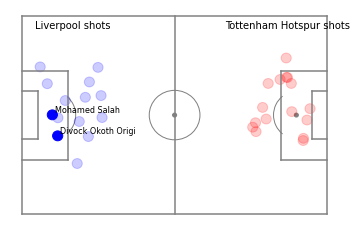

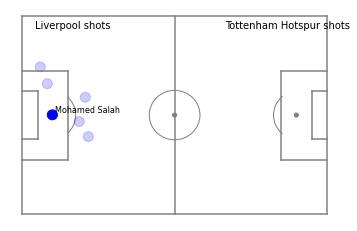

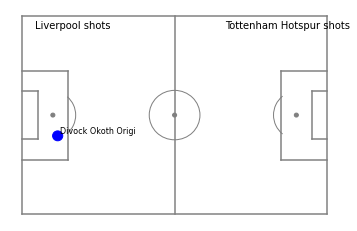

In [192]:
home_team_name = "Tottenham Hotspur"
away_team_name = "Liverpool"
plot_shots(df, home_team_name, away_team_name)
plot_shots(df, home_team_name, away_team_name, "Mohamed Salah")
plot_shots(df, home_team_name, away_team_name, "Divock Okoth Origi")

In [164]:
def plot_passes(df, player_name=None):
    """
    Plot the passes made by a specific player or all passes if no player is specified on a football pitch.

    Parameters:
    - df: DataFrame containing event data.
    - player_name: The name of the player whose passes to plot, or None to plot all passes.
    """
    # Conditionally filter for passes based on the player_name
    if player_name:
        passes = df.loc[(df['type_name'] == 'Pass') & (df['player_name'] == player_name)]
    else:
        passes = df.loc[df['type_name'] == 'Pass']
    
    # Draw the pitch
    pitchLengthX, pitchWidthY = 120, 80
    (fig, ax) = createPitch(pitchLengthX, pitchWidthY, 'yards', 'gray')
    
    # Iterate through the passes and draw them
    for _, thepass in passes.iterrows():
        x, y = thepass['location']
        passCircle = plt.Circle((x, pitchWidthY - y), 2, color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        
        dx = thepass['pass_end_location'][0] - x
        dy = thepass['pass_end_location'][1] - y
        passArrow = plt.Arrow(x, pitchWidthY - y, dx, -dy, width=3, color="blue")
        ax.add_patch(passArrow)

    fig.set_size_inches(10, 7)
    plt.show()

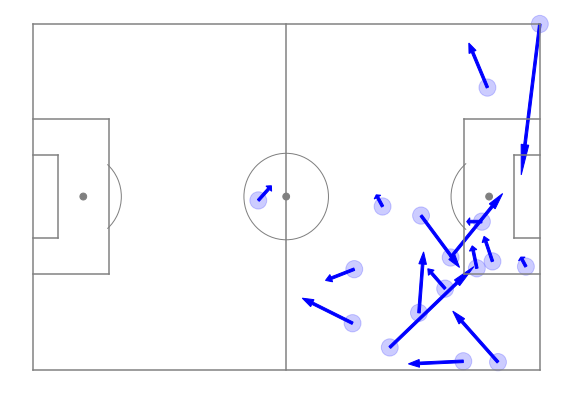

In [167]:
plot_passes(df, 'Mohamed Salah')